In [1]:
from yoloDetector import YoloDetector

In [3]:
detector = YoloDetector()


In [5]:
import cv2
img = cv2.imread('test6.jpg')

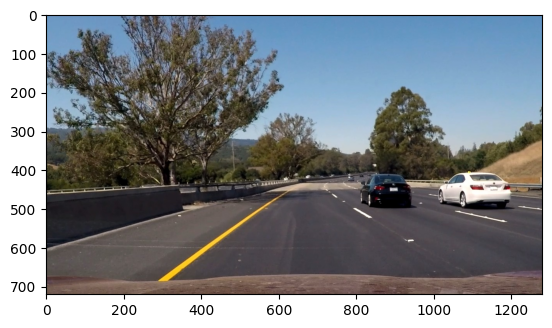

In [6]:
import matplotlib.pyplot as plt 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
detector.DetectFrame(img)

In [8]:
detector.DrawDetectedOnFrame(img)

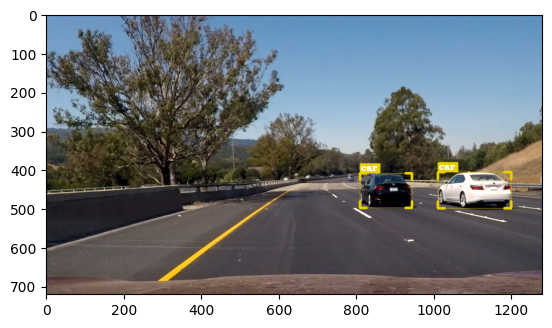

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
for i in detector._object_info:
    print(i)
    print(i.x, i.y, i.width, i.height)



RectInfo(x=1011.9137573242188, y=406.5517884426891, width=188.7481689453125, height=93.33708703297975, conf=0.9047901630401611, label='car', kpss=[])
1011.9137573242188 406.5517884426891 188.7481689453125 93.33708703297975
RectInfo(x=810.3907775878906, y=409.72318867475786, width=134.56756591796875, height=89.25479452548427, conf=0.876821756362915, label='car', kpss=[])
810.3907775878906 409.72318867475786 134.56756591796875 89.25479452548427


In [11]:
def IoU(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    
    iou = 0.0

    ########################
    #### YOUR CODE HERE ####
    ########################
    xA = max(x1, x2)
    yA = max(y1, y2)
    xB = min(x1 + w1, x2 + w2)
    yB = min(y1 + h1, y2 + h2)

    interArea = max(0, xB - xA) * max(0, yB - yA)

    box1Area = w1 * h1
    box2Area = w2 * h2

    iou = interArea / float(box1Area + box2Area - interArea)

    return iou

In [ ]:
def evaluate_detector(detector, path = 'data/test_ann.txt'):
    TP = 0
    FP = 0
    FN = 0

    ### tạo đối tượng CascadeClassifier và khởi tạo bằng file xml đã học được 
    # our_cascade = cv2.CascadeClassifier('cascade.xml')

    threshold = 0.3
    with open(path, 'r') as f:
        
        for line in f:
            #preprocess path
            line = line.split(' ')
            image_path = line[0]
            truth_box = [int(line[i]) for i in range(2, 6)]
            
            ### 
            img = cv2.imread(image_path)
            
            ### thực hiện detectMultiScale bằng our_cascade để phát hiện vị trí bàn tay cars
            detector.DetectFrame(img)
            cars = detector._object_info
            # print(cars)
            if len(cars) == 0:
                FN += 1
                continue
            
            true_detect = 0
            for detection in cars:
                box = (detection.x, detection.y, detection.width, detection.height)
                t = IoU(detection, truth_box)
                if t >= threshold:
                    true_detect += 1
            TP += true_detect
            FP += len(cars) - true_detect

    precision = 1.0 * TP / (TP + FP)
    recall = 1.0 * TP / (TP + FN)
    f1 = 2 * precision * recall / (precision + recall)
    print(precision)
    print(recall)
    print(f1)
    return precision, recall, f1